In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn= sqlite3.connect("sales_data.db")
cursor = conn.cursor()


In [3]:
# Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price decimal(10, 2)
)
""")

In [4]:
# Insert sample sales data
sample_data = [
    (1,"Mobile", 10,10000),
    (2,"Laptop", 15, 50000),
    (3,"Washing machine", 5,20000),
    (4,"camera", 8, 5000)
]


In [10]:
list=[]
ID=int(input("Enter the number of records you want to insert: "))
product=input("Enter the product name: ")
quantity=int(input("Enter the quantity: ")) 
price=float(input("Enter the price: "))
a=(ID,product,quantity,price)

list.append(a)

In [ ]:
conn= sqlite3.connect("sales_data.db")
cursor = conn.cursor()
cursor.executemany("INSERT INTO sales (id,product, quantity, price) VALUES (?, ?, ?, ?)", list)

In [17]:
cursor.execute("UPDATE sales SET quantity = 15 WHERE id = 3")

In [18]:
conn.commit()

2. Run SQL Query Inside Python and Load with Pandas


In [ ]:
# Connect to the database
conn = sqlite3.connect("sales_data.db")

In [19]:
query = "SELECT * FROM sales"
df = pd.read_sql_query(query, conn)
print(df)

   id          product  quantity  price
0   1           Mobile        10  10000
1   2           Laptop        15  50000
2   3  Washing machine        15  20000
3   4           camera        10   5000
4   5          charger        50    500
5   7              usb        30    100


In [20]:

# Run SQL query
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# Print the results
print(df)


           product  total_qty  revenue
0           Laptop         15   750000
1           Mobile         10   100000
2  Washing machine         15   300000
3           camera         10    50000
4          charger         50    25000
5              usb         30     3000


3. Plot a Simple Bar Chart

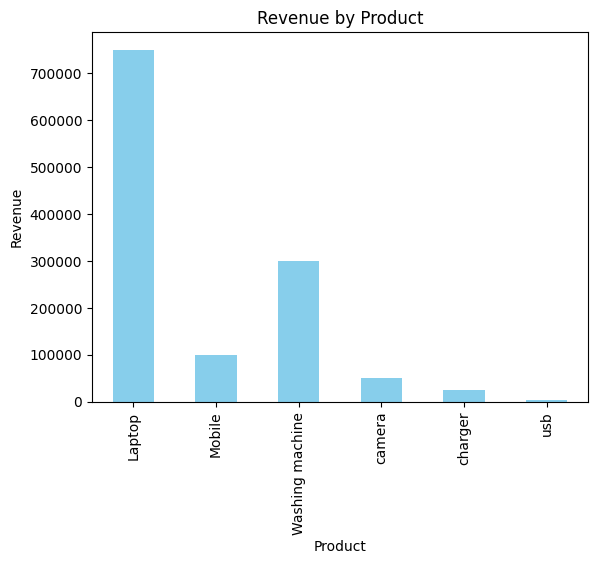

In [21]:
# Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.savefig("sales_chart.png")  # Optional: Save the plot
plt.show()


In [22]:
conn.close()    